In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from evergreen.transform import four_point_transform
import imutils
from skimage.filters import threshold_local

In [2]:
def displayColorImage(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation="nearest")
    plt.title(title)
    plt.show()

In [3]:
def displayGrayScaleImage(image, title):
    plt.imshow(image, cmap='gray', vmin = 0.0, vmax = 255.0)
    plt.title(title)
    plt.show()

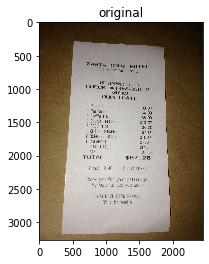

In [4]:
orig = cv2.imread("./data/receipt05.jpg")
displayColorImage(orig, "original")

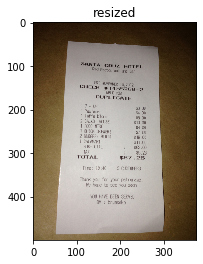

In [5]:
image = orig.copy()
ratio = image.shape[0]/500.0
image = imutils.resize(image, height=500)
displayColorImage(image,"resized")

### Step 1 : Detect edge

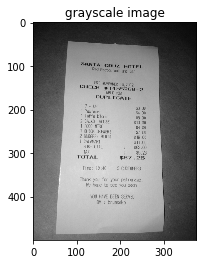

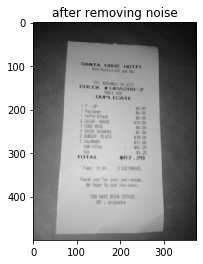

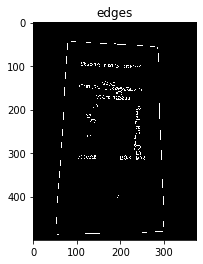

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray,"grayscale image")
gray = cv2.GaussianBlur(gray, (5,5),0)
displayGrayScaleImage(gray,"after removing noise")
edged = cv2.Canny(gray, 75, 200)
displayGrayScaleImage(edged,"edges")


### Step 2: Finding and Drawing contour

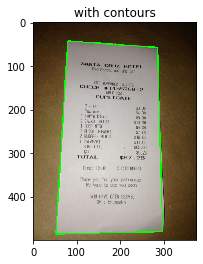

[[[ 79  43]]

 [[ 52 486]]

 [[296 480]]

 [[284  58]]]
[[ 79  43]
 [ 52 486]
 [296 480]
 [284  58]]


In [9]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:4]

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*peri, True)
    if len(approx) == 4 :
        screenCnt = approx
        break

cv2.drawContours(image, [screenCnt], -1, (0,255,0),2)
displayColorImage(image, "with contours")
print(screenCnt)
print(screenCnt.reshape(4,2))

### Step 3: Apply 4 point transform and get top down view

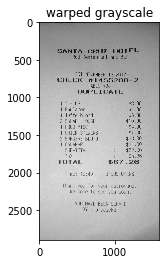

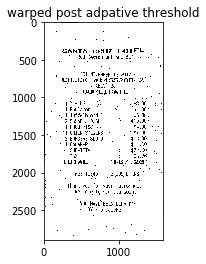

In [10]:
warped = four_point_transform(orig, screenCnt.reshape(4,2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(warped, "warped grayscale")
warped = cv2.adaptiveThreshold(warped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 35, 7)
displayGrayScaleImage(warped, "warped post adpative threshold")